##  Linear Regression & Loss Function

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 문제 1 Grid Search를 활용한 Linear Regression

linear regression 과 **Grid Search**  을 이용해 아래 데이터를 linear regression 해주세요. 


###  Grid Search


1. 탐색할 가중치 조합을 구성합니다. 이 때 `np.meshgrid` 혹은 `np.mgrid`로 구성합니다. 

2. 위의 가중치 조합에서 가중치를 뽑아, 예측값을 산출합니다.

3. 실제 값과 예측값의 차이를 MSE로 계산합니다.

3. 모든 가중치 조합 중 가장 작은 MSE를 보이는 Loss값 조합을 찾습니다.


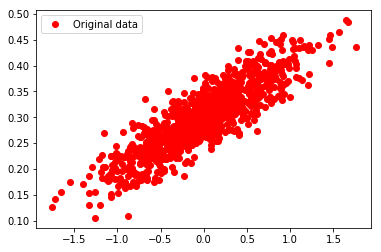

In [11]:
# 아래 코드를 실행해 주세요 
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

xs = np.asarray([v[0] for v in vectors_set])
ys = np.asarray([v[1] for v in vectors_set])

plt.plot(xs, ys, 'ro', label='Original data')
plt.legend()
plt.show()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요

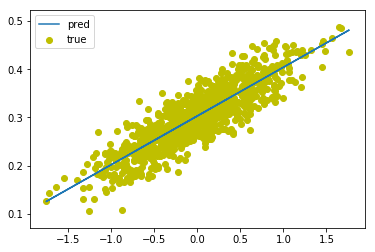

In [12]:
# 정답을 서술해주세요!
import tensorflow as tf
# 가능한 기울기, 절편의 가중치 조합
ws = tf.linspace(0.0, 2.0, 100)
bs = tf.linspace(0.0, 2.0, 100)
mg_ = tf.meshgrid(ws, bs)
prms = tf.reshape(tf.stack(mg_, axis=-1), [-1,2])

# loss fn 정의
def get_loss(w,b):
    y_hat = w * xs + b
    return tf.reduce_mean(tf.square(ys - y_hat))

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # prms = prms.eval()
    for w,b in prms.eval():
        losses.append(get_loss(w,b))
    losses = tf.convert_to_tensor(losses)
    
    sorted_idx = tf.argsort(losses)
#     print(sess.run(sorted_idx))
    
    sorted_labels = tf.gather_nd(prms, tf.reshape(sorted_idx,[-1,1]))   
    # sorted_labels = prms[sorted_idx]
    w_hat = sorted_labels[:1,0].eval() 
    b_hat = sorted_labels[:1,1].eval()
    
    # 결과그리기
    plt.scatter(xs, ys, c ='y', marker = 'o', label='true')
    plt.plot(xs, w_hat * xs + b_hat, label='pred')
    plt.legend()
    plt.show()

#### 정답 확인
* 아래와 같이 출력이 나오도록 해주세요

![Imgur](https://i.imgur.com/zEiW7zM.png)

## 문제 2

문제 1과 동일합니다. 다만 Loss function은 MAE(mean absolute Error)을 사용합니다 <br>
아래와 같은 그림이 나올수 있도록 Linear Regression 결과를 시각화 해주세요 

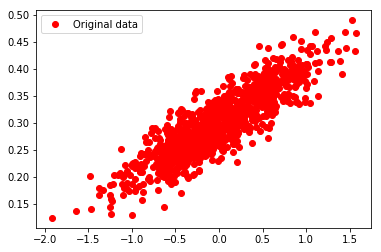

In [13]:
# 아래 코드를 실행해 주세요 
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

xs = np.asarray([v[0] for v in vectors_set])
ys = np.asarray([v[1] for v in vectors_set])

plt.plot(xs, ys, 'ro', label='Original data')
plt.legend()
plt.show()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요

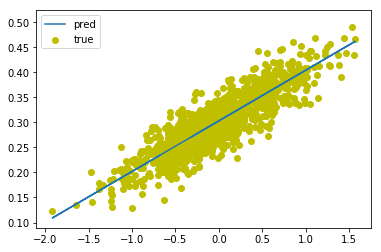

In [14]:
# 정답을 서술해 주세요!


import tensorflow as tf
# 가능한 기울기, 절편의 가중치 조합
ws = tf.linspace(0.0, 2.0, 100)
bs = tf.linspace(0.0, 2.0, 100)
mg_ = tf.meshgrid(ws, bs)
prms = tf.reshape(tf.stack(mg_, axis=-1), [-1,2])

# loss fn 정의
def get_loss(w,b):
    y_hat = w * xs + b
    return tf.reduce_mean(tf.math.abs(ys - y_hat))

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # prms = prms.eval()
    for w,b in prms.eval():
        losses.append(get_loss(w,b))
    losses = tf.convert_to_tensor(losses)
    
    sorted_idx = tf.argsort(losses)
#     print(sess.run(sorted_idx))
    
    sorted_labels = tf.gather_nd(prms, tf.reshape(sorted_idx,[-1,1]))   
    # sorted_labels = prms[sorted_idx]
    w_hat = sorted_labels[:1,0].eval() 
    b_hat = sorted_labels[:1,1].eval()
    
    # 결과 그리기
    plt.scatter(xs, ys, c ='y', marker = 'o', label='true')
    plt.plot(xs, w_hat * xs + b_hat, label='pred')
    plt.legend()
    plt.show()


#### 정답 확인
* 아래와 같이 출력이 나오도록 해주세요

![Imgur](https://i.imgur.com/ycO3RGp.png)